<p style="align: center;"><img align=center src="https://drive.google.com/uc?export=view&id=1I8kDikouqpH4hf7JBiSYAeNT2IO52T-T" width=600 height=480/></p>
<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Сегментация изображений</b></h3>


В этом задании вам предстоит решить задачу сегментации медицинских снимков. Часть кода с загрузкой данных написана за вас. Всю содержательную сторону вопроса вам нужно заполнить самостоятельно. Задание оценивается из 15 баллов. 

Обратите внимание, что отчёт по заданию стоит целых 6 баллов. Он вынесен в отдельный пункт в конце тетради. Это сделано для того, чтобы тетрадь была оформлена как законченный документ о проведении экспериментов. Неотъемлемой составляющей отчёта является ответ на следующие вопросы:

* Что было сделано? Что получилось реализовать, что не получилось?
* Какие результаты ожидалось получить?
* Какие результаты были достигнуты?
* Чем результаты различных подходов отличались друг от друга и от бейзлайна (если таковой присутствует)?




Домашнее Задание Комаровой АВ.

---


1. Для начала мы скачаем датасет: [ADDI project](https://www.fc.up.pt/addi/ph2%20database.html).

<table><tr><td>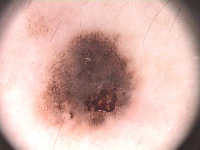</td><td>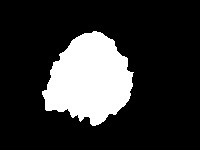</td></tr></table>

2. Разархивируем .rar файл.
3. Обратите внимание, что папка  `PH2 Dataset images` должна лежать там же где и ipynb notebook.

Это фотографии двух типов **поражений кожи:** меланома и родинки.
В данном задании мы не будем заниматься их классификацией, а будем **сегментировать** их.

In [1]:
!wget -c https://www.dropbox.com/s/k88qukc20ljnbuo/PH2Dataset.rar


--2022-12-03 17:38:31--  https://www.dropbox.com/s/k88qukc20ljnbuo/PH2Dataset.rar
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/k88qukc20ljnbuo/PH2Dataset.rar [following]
--2022-12-03 17:38:31--  https://www.dropbox.com/s/raw/k88qukc20ljnbuo/PH2Dataset.rar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc300fd39f7a43ebc5840705ef34.dl.dropboxusercontent.com/cd/0/inline/Bx7oZ8PMrvVN3pOetMt6v9sFqzhXE_pF5RNNINSkpRnGjvg1gPeOciZfmDTCI2djySrwnDCIxa-2jMEnuHS8R8PLfT4qvCXif8tbNJFgs8X_3NEHXFy5CLB_l9Yi4-0VPtvbts_sda0P52tDHXh81hNvWq3in-aMd4wONOcNpyDqnA/file# [following]
--2022-12-03 17:38:32--  https://uc300fd39f7a43ebc5840705ef34.dl.dropboxusercontent.com/cd/0/inline/Bx7oZ8PMrvVN3pOetMt6v9sFqzhXE_pF5RNNINSkpRnGjvg1gPeOciZfmDTCI2djySrwnDC

In [2]:
!ls

PH2Dataset.rar	sample_data


In [3]:
get_ipython().system_raw("unrar x PH2Dataset")

Стуктура датасета у нас следующая:

    IMD_002/
        IMD002_Dermoscopic_Image/
            IMD002.bmp
        IMD002_lesion/
            IMD002_lesion.bmp
        IMD002_roi/
            ...
    IMD_003/
        ...
        ...

 Здесь `X.bmp` — изображение, которое нужно сегментировать, `X_lesion.bmp` — результат сегментации.

Для загрузки датасета можно использовать skimage: [`skimage.io.imread()`](https://scikit-image.org/docs/dev/api/skimage.io.html)

In [4]:
images = []
lesions = []
from skimage.io import imread
import os
root = 'PH2Dataset'

for root, dirs, files in os.walk(os.path.join(root, 'PH2 Dataset images')):
    if root.endswith('_Dermoscopic_Image'):
        images.append(imread(os.path.join(root, files[0])))
    if root.endswith('_lesion'):
        lesions.append(imread(os.path.join(root, files[0])))

Изображения имеют разные размеры. Давайте изменим их размер на $256\times256 $ пикселей. Для изменения размера изображений можно использовать [`skimage.transform.resize()`](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize).
Эта функция также автоматически нормализует изображения в диапазоне $[0,1]$.


In [5]:
from skimage.transform import resize
size = (256, 256)
X = [resize(x, size, mode='constant', anti_aliasing=True,) for x in images]
Y = [resize(y, size, mode='constant', anti_aliasing=False) > 0.5 for y in lesions]

In [6]:
import numpy as np
X = np.array(X, np.float32)
Y = np.array(Y, np.float32)
print(f'Loaded {len(X)} images')

Loaded 200 images


In [7]:
len(lesions)

200

Чтобы убедиться, что все корректно, мы нарисуем несколько изображений

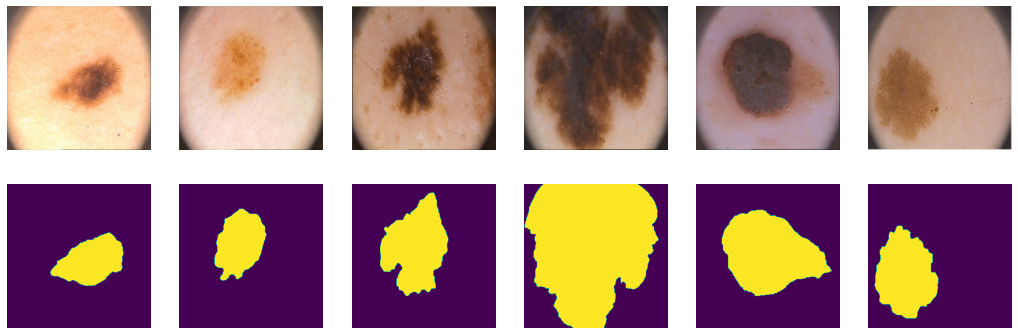

In [8]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

plt.figure(figsize=(18, 6))
for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.axis("off")
    plt.imshow(X[i])

    plt.subplot(2, 6, i+7)
    plt.axis("off")
    plt.imshow(Y[i])
plt.show();

Разделим наши 200 картинок на 100/50/50
 для обучения, валидации и теста соответственно

In [9]:
ix = np.random.choice(len(X), len(X), False)
tr, val, ts = np.split(ix, [100, 150])

In [10]:
print(len(tr), len(val), len(ts))

100 50 50


#### PyTorch DataLoader

In [11]:
from torch.utils.data import DataLoader
batch_size = 8
data_tr = DataLoader(list(zip(np.rollaxis(X[tr], 3, 1), Y[tr, np.newaxis])), 
                     batch_size=batch_size, shuffle=True)
data_val = DataLoader(list(zip(np.rollaxis(X[val], 3, 1), Y[val, np.newaxis])),
                      batch_size=batch_size, shuffle=True)
data_ts = DataLoader(list(zip(np.rollaxis(X[ts], 3, 1), Y[ts, np.newaxis])),
                     batch_size=batch_size, shuffle=True)

In [12]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import torch.optim as optim
from time import time
from torchsummary import summary

from matplotlib import rcParams
rcParams['figure.figsize'] = (15,4)

# Реализация различных архитектур:
Ваше задание будет состоять в том, чтобы написать несколько нейросетевых архитектур для решения задачи семантической сегментации. Сравнить их по качеству на тесте и испробовать различные лосс функции для них.

## Метрика

В данном разделе предлагается использовать следующую метрику для оценки качества:

$I o U=\frac{\text {target } \cap \text { prediction }}{\text {target } \cup{prediction }}$

Пересечение (A ∩ B) состоит из пикселей, найденных как в маске предсказания, так и в основной маске истины, тогда как объединение (A ∪ B) просто состоит из всех пикселей, найденных либо в маске предсказания, либо в целевой маске.


Для примера посмотрим на истину (слева) и предсказание (справа):
![alt text](https://www.jeremyjordan.me/content/images/2018/05/target_prediction.png)


Тогда пересечение и объединение будет выглядеть так:

![alt text](https://www.jeremyjordan.me/content/images/2018/05/intersection_union.png)

In [14]:
def iou_pytorch(outputs: torch.Tensor, labels: torch.Tensor):
    # You can comment out this line if you are passing tensors of equal shape
    # But if you are passing output from UNet or something it will most probably
    # be with the BATCH x 1 x H x W shape
    outputs = outputs.squeeze(1).byte()  # BATCH x 1 x H x W => BATCH x H x W
    labels = labels.squeeze(1).byte()
    SMOOTH = 1e-8
    intersection = (outputs & labels).float().sum((1, 2))  # Will be zero if Truth=0 or Prediction=0
    union = (outputs | labels).float().sum((1, 2))         # Will be zzero if both are 0
    
    iou = (intersection + SMOOTH) / (union + SMOOTH)
    # We smooth our devision to avoid 0/0
    
    thresholded = torch.clamp(20 * (iou - 0.5), 0, 10).ceil() / 10  # This is equal to comparing with thresolds
    return thresholded
    #return iou  

## Функция потерь [1 балл]

Не менее важным, чем построение архитектуры, является определение **оптимизатора** и **функции потерь.**

Функция потерь - это то, что мы пытаемся минимизировать. Многие из них могут быть использованы для задачи бинарной семантической сегментации. 

Популярным методом для бинарной сегментации является *бинарная кросс-энтропия*, которая задается следующим образом:

$$\mathcal L_{BCE}(y, \hat y) = -\sum_i \left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

где $y$ это  таргет желаемого результата и $\hat y$ является выходом модели. $\sigma$ - это [*логистическая* функция](https://en.wikipedia.org/wiki/Sigmoid_function), который преобразует действительное число $\mathbb R$ в вероятность $[0,1]$.

Однако эта потеря страдает от проблем численной нестабильности. Самое главное, что $\lim_{x\rightarrow0}\log(x)=\infty$ приводит к неустойчивости в процессе оптимизации. Рекомендуется посмотреть следующее [упрощение](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits). Эта функция эквивалентна первой и не так подвержена численной неустойчивости:

$$\mathcal L_{BCE} = \hat y - y\hat y + \log\left(1+\exp(-\hat y)\right).$$

In [15]:
def bce_loss(y_pred, y_real):
    loss = y_pred - y_pred*y_real + (1 + torch.exp(-y_pred)).log()
    return loss.mean()

## Тренировка [1 балл]

Мы определим цикл обучения в функции, чтобы мы могли повторно использовать его.

In [16]:
# глобальные константы
MAX_EPOCHS = 90
BASE_LR = 3e-4
WEIGHT_DECAY = 0.05

In [17]:
def train(model, optimizer, loss_fn, epochs, data_tr, data_val, used_sheduler=True):
    X_val, Y_val = next(iter(data_val))
    history = {"epochs": np.arange(epochs)+1, "train": {"score": [], "loss": []},  "val": {"score": [], "loss": []}}
    if used_sheduler:
        scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[epochs//3,epochs//2,epochs//1.4,epochs//1.1], gamma=0.8)
       
    for epoch in range(epochs):
        tic = time()
        print('* Epoch %d/%d' % (epoch+1, epochs))

        avg_loss = 0
        avg_score = 0
        avg_loss_val = 0
        avg_score_val = 0

        model.train()  # train mode
        for X_batch, Y_batch in data_tr:
            X_batch = X_batch.to(device)  # data to device
            Y_batch = Y_batch.to(device)  # data to device

            # set parameter gradients to zero
            optimizer.zero_grad()

            # forward
            Y_pred = model(X_batch)
            loss =  loss_fn(Y_pred, Y_batch) # forward-pass
            loss.backward()  # backward-pass
            optimizer.step()  # update weights
            score = iou_pytorch(torch.sigmoid(Y_pred) > 0.5, Y_batch).mean().item()

            # calculate loss to show the user
            avg_loss += loss / len(data_tr)
            avg_score += score/ len(data_tr)
        toc = time()
        print('loss: %f' % avg_loss)
        if used_sheduler:
          scheduler.step()

        # show intermediate results
        model.eval()  # testing mode
        Y_hat = model(X_val.to(device)).detach().to("cpu") # detach and put into cpu
        loss_val = loss
        
        # Visualize tools
        clear_output(wait=True)

        for Xv_batch, Yv_batch in data_val:
            Xv_batch = Xv_batch.to(device)
            Yv_batch = Yv_batch.to(device)
            Y_pred_val = model(Xv_batch)
            loss_val = loss_fn(Y_pred_val, Yv_batch)
            score_val = iou_pytorch(torch.sigmoid(Y_pred_val) > 0.5, Yv_batch).mean().item()
            avg_loss_val += loss / len(data_val)
            avg_score_val += score_val/ len(data_val)
        
        history["train"]["score"].append(avg_score)
        history["val"]["score"].append(avg_score_val)
        history["train"]["loss"].append(avg_loss.item())
        history["val"]["loss"].append(avg_loss_val.item())
        fig, ax = plt.subplots(2, 6, figsize = (12, 8))

        for k in range(6):
            ax[0, k].imshow(np.rollaxis(X_val[k].numpy(), 0, 3), cmap='gray')
            ax[0, k].set_title("\nReal")
            ax[0, k].axis('off')
            ax[1, k].imshow(torch.sigmoid(Y_hat[k, 0]) > 0.5, cmap='gray')
            ax[1, k].set_title("Output")
            ax[1, k].axis('off') 
                              
        plt.suptitle('%d / %d - train_loss: %f , val_loss: %f, train_score: %f, val_score: %f' % (epoch+1, epochs, avg_loss, avg_loss_val, avg_score, avg_score_val))
        plt.tight_layout()
        plt.show()

   # очистка кеша

    X_batch.to("cpu")
    Y_batch.to("cpu")
    Xv_batch.to("cpu")
    Yv_batch.to("cpu")
    del model
    del X_batch
    del Y_batch
    del Xv_batch
    del Yv_batch
    torch.cuda.empty_cache()

    return history

## Инференс [1 балл]

После обучения модели эту функцию можно использовать для прогнозирования сегментации на новых данных:

In [18]:
def score_model(model, metric, data):
    model.eval()  # testing mode
    scores = 0
    for X_batch, Y_label in data:
        Y_pred = torch.sigmoid(model(X_batch.to(device))) > 0.5
        scores += metric(Y_pred, Y_label.to(device)).mean().item()
    return scores/len(data)

In [19]:
#вычисление скора на валидационной и ТЕСТОВОЙ выборах 
def scores(model):
    test_score = score_model(model, iou_pytorch, data_ts)
    print(f"score на тесте: {test_score:.4f}")
    return test_score

In [20]:
#Функция для построения графиков лосса и скора по эпохам
def plots(history, model_name):
    fig, ax = plt.subplots(1, 1, figsize = (12, 8))
    x = history["epochs"]
    loss_train = history["train"]["loss"]
    loss_val = history["val"]["loss"]
    score_train = history["train"]["score"]
    score_val = history["val"]["score"]
    ax.plot(x, loss_train, label = "loss_train", color = "blue")
    ax.plot(x, loss_val, label = "loss_val", color = "black")    
    ax.grid(linestyle = "--")
    ax.tick_params(labelsize = 12)
    ax.set_xlabel("epoch", fontsize = 12)
    ax.set_title("Loss and Scores", fontsize = 14)
    ax.plot(x, score_train, label = "score_train", color = "green")
    ax.plot(x, score_val, label = "score_val", color = "red")
    #ax.set_xlim(left = 0, right = x.max())
    #ax.set_ylim(bottom = 0)
    ax.legend(fontsize = 12)
    plt.suptitle(f"Model  {model_name}", fontsize = 15, y=1.05)
    plt.tight_layout()
    plt.show()


## Основной момент: обучение

Обучите вашу модель. Обратите внимание, что обучать необходимо до сходимости. Если указанного количества эпох (20) не хватило, попробуйте изменять количество эпох до сходимости алгоритма. Сходимость определяйте по изменению функции потерь на валидационной выборке.
 С параметрами оптимизатора можно спокойно играть, пока вы не найдете лучший вариант для себя.


-----------------------------------------------------------------------------------------

# SegNet [2 балла]

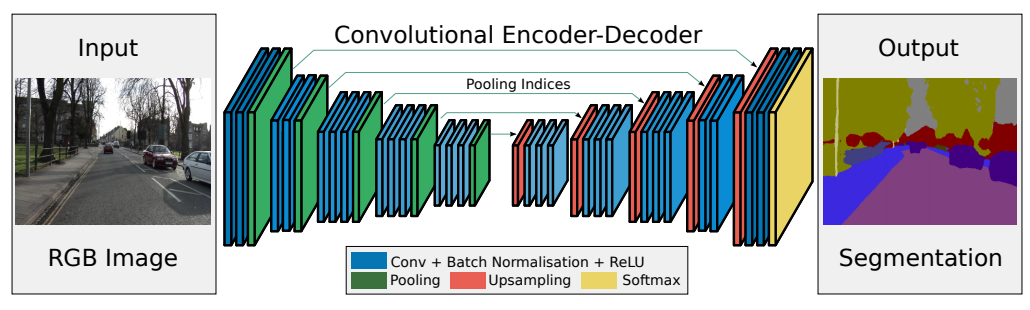

* Badrinarayanan, V., Kendall, A., & Cipolla, R. (2015). [SegNet: A deep convolutional
encoder-decoder architecture for image segmentation](https://arxiv.org/pdf/1511.00561.pdf)

Внимательно посмотрите из чего состоит модель и для чего выбраны те или иные блоки.

In [21]:
class SegNet(nn.Module):
    def __init__(self):
        super().__init__()

        # encoder (downsampling)
        # Each enc_conv/dec_conv block should look like this:
        # nn.Sequential(
        #     nn.Conv2d(...),
        #     ... (2 or 3 conv layers with relu and batchnorm),

        self.enc_conv0 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
            )
        self.pool0 = nn.MaxPool2d(2, 2, return_indices=True)
        self.enc_conv1 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
            )
        self.pool1 = nn.MaxPool2d(2, 2, return_indices=True)
        self.enc_conv2 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
            )
        self.pool2 = nn.MaxPool2d(2, 2, return_indices=True)
        self.enc_conv3 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
            )
        self.pool3 = nn.MaxPool2d(2, 2, return_indices=True)

        # bottleneck
        self.bottleneck_conv = nn.Sequential(
            nn.Conv2d(512, 1024, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(1024),
            nn.ReLU(),
            nn.Conv2d(1024, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
            )

        # decoder (upsampling)
        self.upsample0 = nn.MaxUnpool2d(2, 2)
        self.dec_conv0 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
            )
        self.upsample1 = nn.MaxUnpool2d(2, 2)
        self.dec_conv1 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
            )
        self.upsample2 = nn.MaxUnpool2d(2, 2)
        self.dec_conv2 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
            )
        self.upsample3 = nn.MaxUnpool2d(2, 2)
        self.dec_conv3 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 1, kernel_size=3, stride=1, padding=1),
            )

    def forward(self, x):
        # encoder
        e0, i0 = self.pool0(self.enc_conv0(x))
        e1, i1  = self.pool1(self.enc_conv1(e0))
        e2, i2 = self.pool2(self.enc_conv2(e1))
        e3, i3  = self.pool3(self.enc_conv3(e2)) 

        # bottleneck
        b = self.bottleneck_conv(e3)

        # decoder
        d0 = self.dec_conv0(self.upsample0(b, i3))
        d1 = self.dec_conv1(self.upsample1(d0, i2))
        d2 = self.dec_conv2(self.upsample2(d1, i1))
        d3 = self.dec_conv3(self.upsample3(d2, i0))
        return d3

In [22]:
print(summary(SegNet().to(device), (3, 256, 256)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
       BatchNorm2d-2         [-1, 64, 256, 256]             128
              ReLU-3         [-1, 64, 256, 256]               0
            Conv2d-4         [-1, 64, 256, 256]          36,928
       BatchNorm2d-5         [-1, 64, 256, 256]             128
              ReLU-6         [-1, 64, 256, 256]               0
         MaxPool2d-7  [[-1, 64, 128, 128], [-1, 64, 128, 128]]               0
            Conv2d-8        [-1, 128, 128, 128]          73,856
       BatchNorm2d-9        [-1, 128, 128, 128]             256
             ReLU-10        [-1, 128, 128, 128]               0
           Conv2d-11        [-1, 128, 128, 128]         147,584
      BatchNorm2d-12        [-1, 128, 128, 128]             256
             ReLU-13        [-1, 128, 128, 128]               0
        MaxPool2d-14  [[

## SegNet+bce

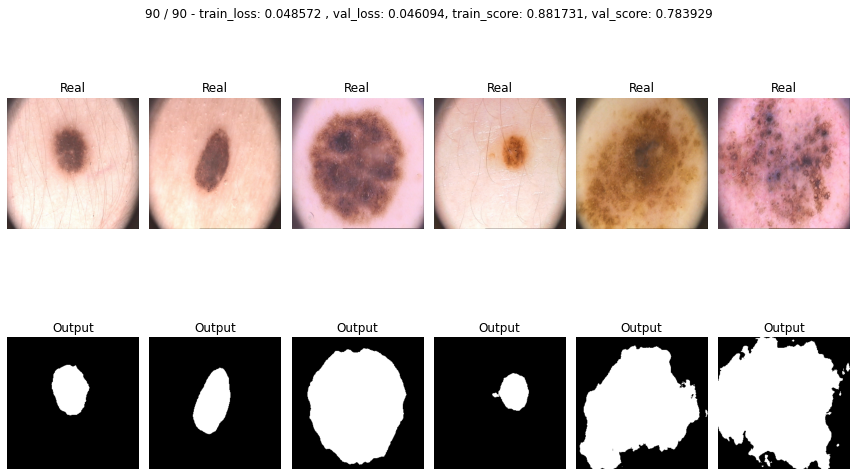

In [23]:
model_Seg_bce = SegNet().to(device)
optim = torch.optim.AdamW(model_Seg_bce.parameters(), lr=BASE_LR, weight_decay=WEIGHT_DECAY)
history_segnet_bce  = train(model_Seg_bce, optim, bce_loss, MAX_EPOCHS, data_tr, data_val, used_sheduler=True)

In [24]:
segnet_bce_test_score = scores(model_Seg_bce)

score на тесте: 0.7732


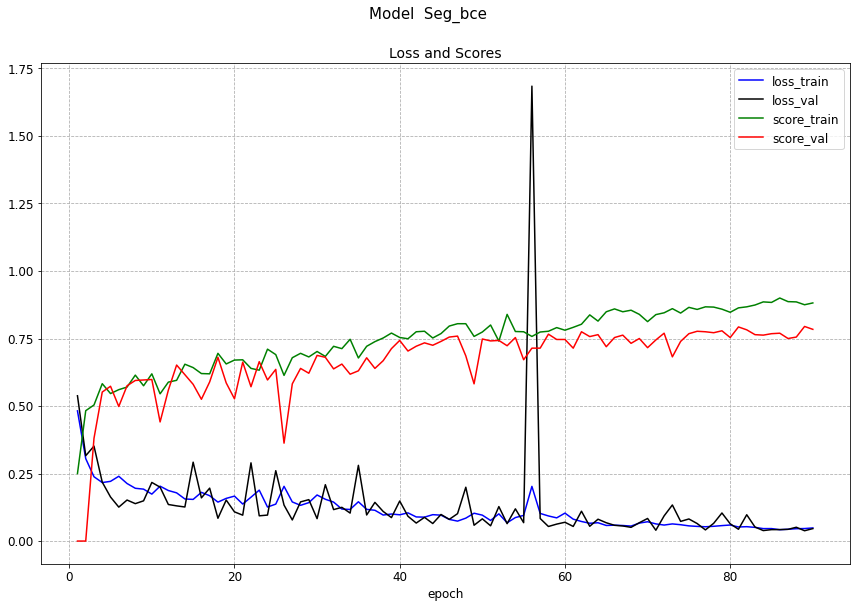

In [25]:
plots(history_segnet_bce, 'Seg_bce')

Что это за выброс такой, очень интересно. По-видимому, какие-то картинки модель плохо окрасила.

In [26]:
# освобождаем память
model_Seg_bce.to("cpu")
del model_Seg_bce
torch.cuda.empty_cache()
!nvidia-smi

Sat Dec  3 17:48:17 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   80C    P0    47W /  70W |   1448MiB / 15109MiB |     42%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Ответьте себе на вопрос: не переобучается ли моя модель?

**ОТВЕТ:** Кажется, что да, модель может переучиться, так как данных мало. Однако, стоит отметить, что благодаря наших ухищрениям и работе с параметрами, переобучение не сильное.

## SegNet+dice

 В данном разделе вам потребуется имплементировать две функции потерь:
 DICE и Focal loss. 
 Если у вас что-то не учится, велика вероятность, что вы ошиблись или учите слишком мало эпох, прежде чем бить тревогу попробуйте перебрать различные варианты и убедитесь, что во всех других сетапах сеть достигает желанного результата. СПОЙЛЕР: учиться она будет при всех лоссах, предложенных в этом задании.


**1. Dice coefficient:** Учитывая две маски $X$ и $Y$, общая метрика для измерения расстояния между этими двумя масками задается следующим образом:

$$D(X,Y)=\frac{2|X\cap Y|}{|X|+|Y|}$$

Эта функция не является дифференцируемой, но это необходимое свойство для градиентного спуска. В данном случае мы можем приблизить его с помощью:

$$\mathcal L_D(X,Y) = 1-\frac{1}{256 \times 256} \times \frac{\sum_i2X_iY_i}{\sum_iX_i+Y_i}.$$

Не забудьте подумать о численной нестабильности, возникающей в математической формуле.


In [27]:
def dice_loss(y_pred, y_real, smooth=1): #параметр smooth решает проблему возможной нестабильности функции
    y_pred = torch.sigmoid(y_pred)
    num = (2*y_pred*y_real).sum((1,2,3)) + smooth
    den = (y_pred + y_real).sum((1,2,3)) + smooth
    res = 1 - (num/den).mean()
    return res 

Проводим тестирование:

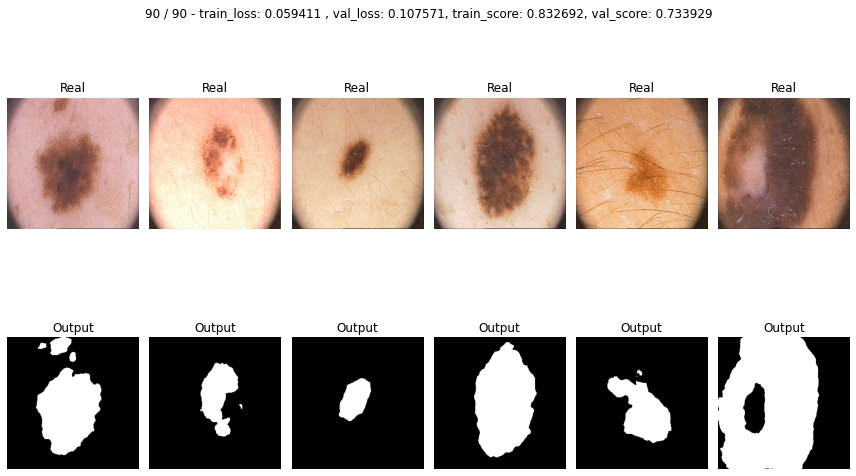

In [28]:
model_Seg_dice = SegNet().to(device)

optim = torch.optim.AdamW(model_Seg_dice.parameters(), lr=BASE_LR, weight_decay=WEIGHT_DECAY)
history_segnet_dice = train(model_Seg_dice, optim, dice_loss, MAX_EPOCHS, data_tr, data_val, used_sheduler=True)

In [29]:
segnet_dice_test_score = scores(model_Seg_dice)

score на тесте: 0.7036


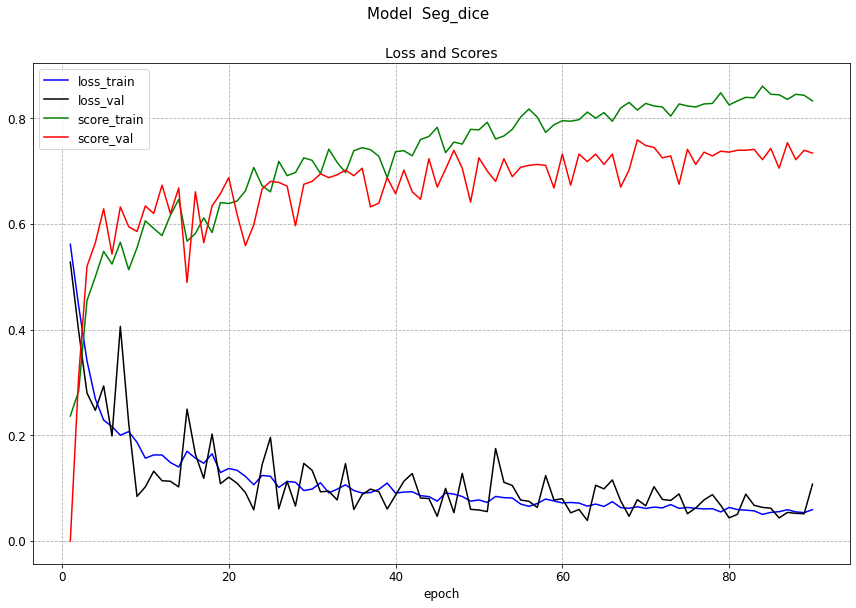

In [30]:
plots(history_segnet_dice, 'Seg_dice')

In [31]:
# освобождаем память
model_Seg_dice.to("cpu")
del model_Seg_dice
torch.cuda.empty_cache()

## SegNet+focal

[**2. Focal loss:**](https://arxiv.org/pdf/1708.02002.pdf) 

Окей, мы уже с вами умеем делать BCE loss:

$$\mathcal L_{BCE}(y, \hat y) = -\sum_i \left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

Проблема с этой потерей заключается в том, что она имеет тенденцию приносить пользу классу **большинства** (фоновому) по отношению к классу **меньшинства** ( переднему). Поэтому обычно применяются весовые коэффициенты к каждому классу:

$$\mathcal L_{wBCE}(y, \hat y) = -\sum_i \alpha_i\left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

Традиционно вес $\alpha_i$ определяется как обратная частота класса этого пикселя $i$, так что наблюдения миноритарного класса весят больше по отношению к классу большинства.

Еще одним недавним дополнением является взвешенный пиксельный вариант, которая взвешивает каждый пиксель по степени уверенности, которую мы имеем в предсказании этого пикселя.

$$\mathcal L_{focal}(y, \hat y) = -\sum_i \left[\left(1-\sigma(\hat y_i)\right)^\gamma y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

Зафиксируем значение $\gamma=2$.

--------------------------------------------------------------------------------


In [32]:
def focal_loss(y_pred, y_real, eps = 1e-8, gamma = 2):
    y = y_pred.sigmoid()+eps
    loss = -((1-y)**gamma*y_real*y.log()+(1-y_real)*(1-y).log())
    
    return loss.mean()

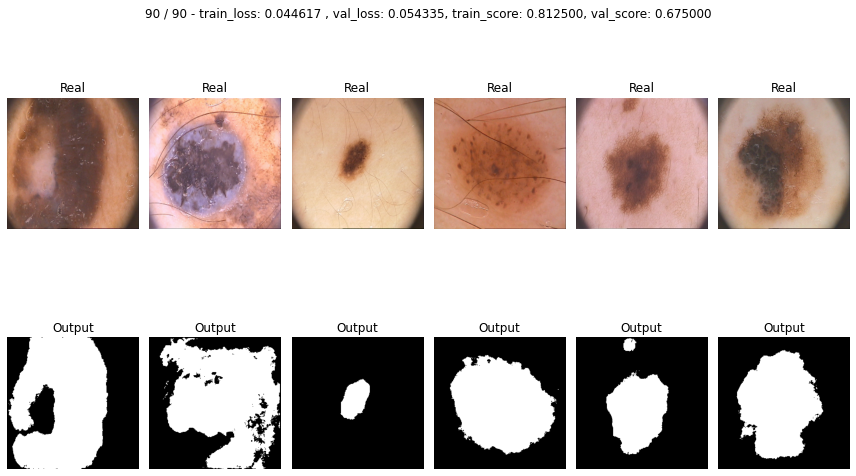

In [33]:
model_Seg_focal = SegNet().to(device)

optim = torch.optim.AdamW(model_Seg_focal.parameters(), lr=BASE_LR, weight_decay=WEIGHT_DECAY)
history_segnet_focal = train(model_Seg_focal, optim, focal_loss, MAX_EPOCHS, data_tr, data_val, used_sheduler=True)

In [34]:
segnet_focal_test_score = scores(model_Seg_focal)

score на тесте: 0.7536


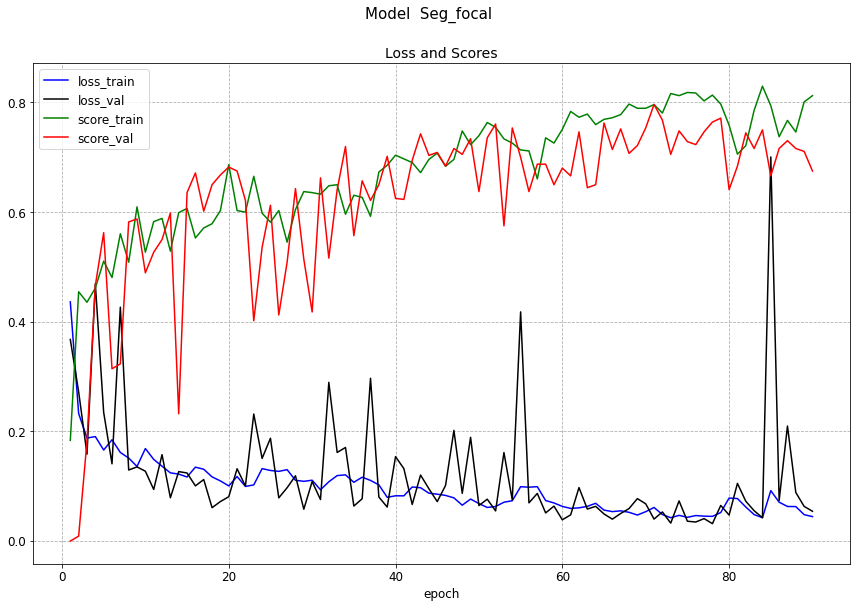

In [35]:
plots(history_segnet_focal, 'Seg_focal')

In [36]:
# освобождаем память
model_Seg_focal.to("cpu")
del model_Seg_focal
torch.cuda.empty_cache()

----------------------------------------------------------------------------------------------

## [BONUS] Мир сегментационных лоссов [5 баллов]

В данном блоке предлагаем вам написать одну функцию потерь самостоятельно. Для этого необходимо прочитать статью и имплементировать ее. Кроме тако провести численное сравнение с предыдущими функциями.
Какие варианты? 

1) Можно учесть Total Variation
2) Lova
3) BCE но с Soft Targets (что-то типа label-smoothing для многослассовой классификации)
4) Любой другой 

* [Physiological Inspired Deep Neural Networks for Emotion Recognition](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8472816&tag=1)". IEEE Access, 6, 53930-53943.

* [Boundary loss for highly unbalanced segmentation](https://arxiv.org/abs/1812.07032)

* [Tversky loss function for image segmentation using 3D fully convolutional deep networks](https://arxiv.org/abs/1706.05721)

* [Correlation Maximized Structural Similarity Loss for Semantic Segmentation](https://arxiv.org/abs/1910.08711)

* [Topology-Preserving Deep Image Segmentation](https://papers.nips.cc/paper/8803-topology-preserving-deep-image-segmentation)

Так как Тверский лосс очень похож на данные выше, то за него будет проставлено только 3 балла (при условии, если в модели нет ошибок при обучении). Постарайтесь сделать что-то интереснее.

## SegNet+tversky

In [37]:
def tversky_loss(y_pred, y_real, smooth=1e-8, alpha=0.3, beta=0.7):
    y_pred = y_pred.sigmoid().view(-1)
    y_real = y_real.view(-1)

    TP = (y_pred * y_real).sum() 
    FP = ((1-y_real) * y_pred).sum() 
    FN = (y_real * (1-y_pred)).sum() 

    return 1 - (TP + smooth) / (TP + alpha*FP + beta*FN + smooth) 

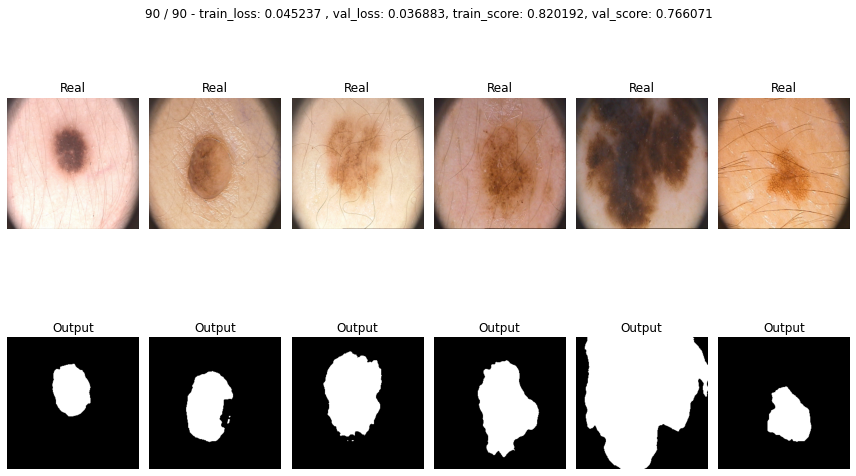

In [38]:
model_Seg_tversky = SegNet().to(device)

optim = torch.optim.AdamW(model_Seg_tversky.parameters(), lr=BASE_LR, weight_decay=WEIGHT_DECAY)
history_segnet_tversky = train(model_Seg_tversky, optim, tversky_loss, MAX_EPOCHS, data_tr, data_val, used_sheduler=True)

In [39]:
segnet_tversky_test_score = scores(model_Seg_tversky)

score на тесте: 0.7768


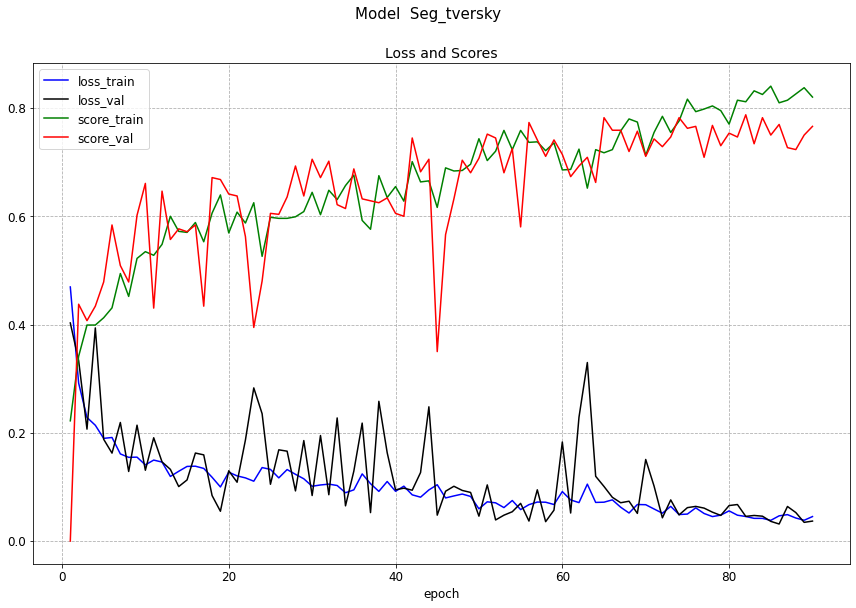

In [40]:
plots(history_segnet_tversky, 'Seg_tversky')

In [41]:
# освобождаем память
model_Seg_tversky.to("cpu")
del model_Seg_tversky
torch.cuda.empty_cache()

-----------------------------------------------------------------------------------------

# U-Net [2 балла]

[**U-Net**](https://arxiv.org/abs/1505.04597) — это архитектура нейронной сети, которая получает изображение и выводит его. Первоначально он был задуман для семантической сегментации (как мы ее будем использовать), но он настолько успешен, что с тех пор используется в других контекстах. Получая на вход медицинское изображение, он выведет изображение в оттенках серого, где интенсивность каждого пикселя зависит от вероятности того, что этот пиксель принадлежит интересующей нас области.

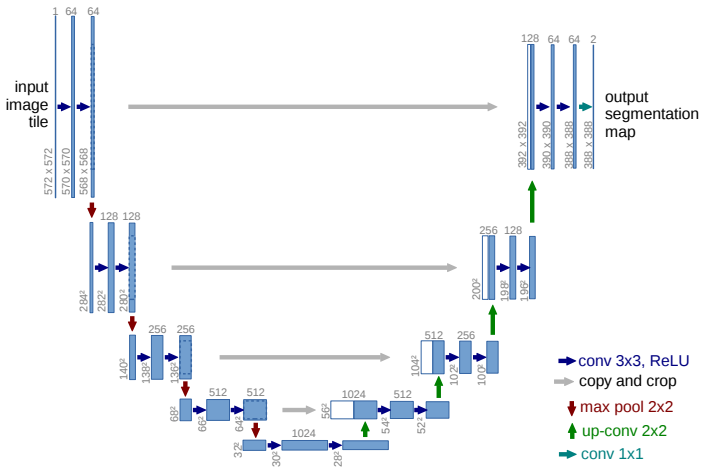

У нас в архитектуре все так же существует энкодер и декодер, как в **SegNet**, но отличительной особеностью данной модели являются *skip-conenctions*, соединяющие части декодера и энкодера. То есть для того чтобы передать на вход декодера тензор, мы конкатенируем симметричный выход с энкодера и выход предыдущего слоя декодера.

* Ronneberger, Olaf, Philipp Fischer, and Thomas Brox. "[U-Net: Convolutional networks for biomedical image segmentation.](https://arxiv.org/pdf/1505.04597.pdf)" International Conference on Medical image computing and computer-assisted intervention. Springer, Cham, 2015.

In [42]:
class UNet(nn.Module):
    def __init__(self):
        super().__init__()


        # encoder (downsampling)
        # Each enc_conv/dec_conv block should look like this:
        # nn.Sequential(
        #     nn.Conv2d(...),
        #     ... (2 or 3 conv layers with relu and batchnorm),

        self.enc_conv0 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
            )
        self.pool0 = nn.MaxPool2d(2, 2, return_indices=True)
        self.enc_conv1 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
            )
        self.pool1 = nn.MaxPool2d(2, 2, return_indices=True)
        self.enc_conv2 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
            )
        self.pool2 = nn.MaxPool2d(2, 2, return_indices=True)
        self.enc_conv3 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
            )
        self.pool3 = nn.MaxPool2d(2, 2, return_indices=True)

        # bottleneck
        self.bottleneck_conv = nn.Sequential(
            nn.Conv2d(512, 1024, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(1024),
            nn.ReLU(),
            nn.Conv2d(1024, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
            )

        # decoder (upsampling)
        self.upsample0 = nn.MaxUnpool2d(2, 2)
        self.dec_conv0 = nn.Sequential(
            nn.Conv2d(512*2, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
            )
        self.upsample1 = nn.MaxUnpool2d(2, 2)
        self.dec_conv1 = nn.Sequential(
            nn.Conv2d(256*2, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
            )
        self.upsample2 = nn.MaxUnpool2d(2, 2)
        self.dec_conv2 = nn.Sequential(
            nn.Conv2d(128*2, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
            )
        self.upsample3 = nn.MaxUnpool2d(2, 2)
        self.dec_conv3 = nn.Sequential(
            nn.Conv2d(64*2, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 1, kernel_size=3, stride=1, padding=1),
            )

    def forward(self, x):

        # encoder
        pre_e0 = self.enc_conv0(x)
        e0, i0 = self.pool0(pre_e0)
        pre_e1 = self.enc_conv1(e0)
        e1, i1 = self.pool1(pre_e1)
        pre_e2 = self.enc_conv2(e1)
        e2, i2 = self.pool2(pre_e2)
        pre_e3 = self.enc_conv3(e2)
        e3, i3 = self.pool3(pre_e3)
        

        # bottleneck
        b = self.bottleneck_conv(e3)

        # decoder
        d0 = self.dec_conv0(torch.cat([self.upsample0(b, i3), pre_e3], 1))
        d1 = self.dec_conv1(torch.cat([self.upsample1(d0, i2), pre_e2], 1))
        d2 = self.dec_conv2(torch.cat([self.upsample2(d1, i1), pre_e1], 1))
        d3 = self.dec_conv3(torch.cat([self.upsample3(d2, i0), pre_e0], 1))

        return d3

In [43]:
print(summary(UNet().to(device), (3, 256, 256)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
       BatchNorm2d-2         [-1, 64, 256, 256]             128
              ReLU-3         [-1, 64, 256, 256]               0
            Conv2d-4         [-1, 64, 256, 256]          36,928
       BatchNorm2d-5         [-1, 64, 256, 256]             128
              ReLU-6         [-1, 64, 256, 256]               0
         MaxPool2d-7  [[-1, 64, 128, 128], [-1, 64, 128, 128]]               0
            Conv2d-8        [-1, 128, 128, 128]          73,856
       BatchNorm2d-9        [-1, 128, 128, 128]             256
             ReLU-10        [-1, 128, 128, 128]               0
           Conv2d-11        [-1, 128, 128, 128]         147,584
      BatchNorm2d-12        [-1, 128, 128, 128]             256
             ReLU-13        [-1, 128, 128, 128]               0
        MaxPool2d-14  [[

## UNet+bce

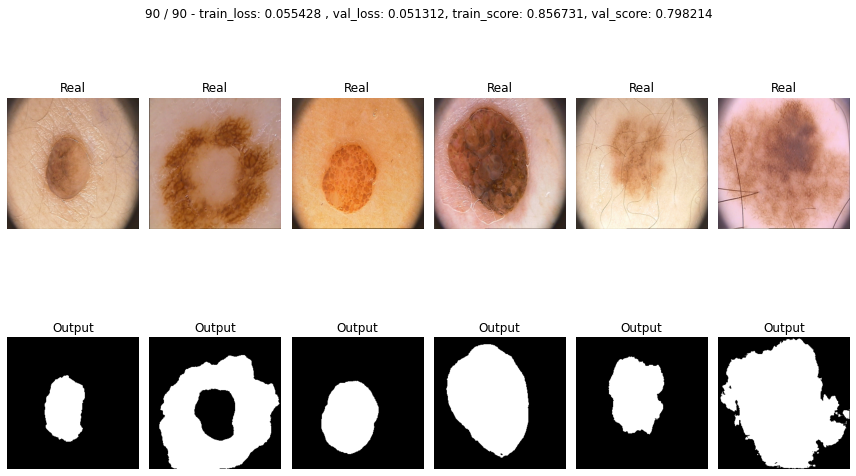

In [44]:
unet_bce = UNet().to(device)

optimizer = torch.optim.AdamW(unet_bce.parameters(), lr = BASE_LR, weight_decay=WEIGHT_DECAY)
history_unet_bce = train(unet_bce, optimizer, bce_loss, MAX_EPOCHS, data_tr, data_val, used_sheduler=True)

In [45]:
unet_bce_test_score = scores(unet_bce)

score на тесте: 0.8196


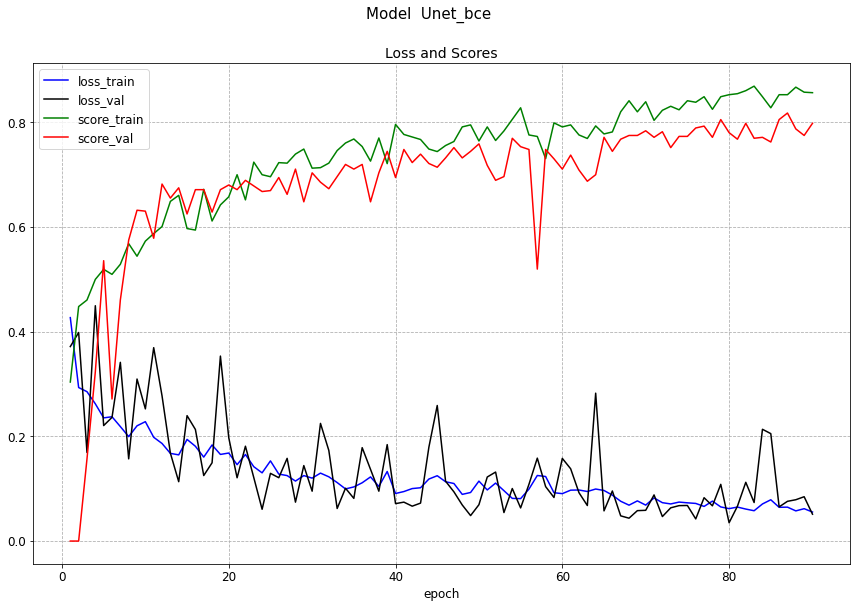

In [46]:
plots(history_unet_bce, 'Unet_bce')

In [47]:
unet_bce.to("cpu")
del unet_bce
torch.cuda.empty_cache()

## UNet+dice

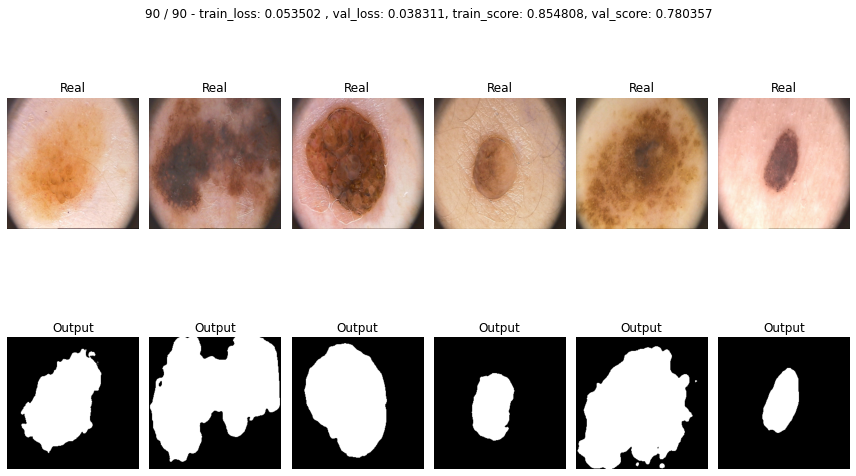

In [48]:
unet_dice = UNet().to(device)

optimizer = torch.optim.AdamW(unet_dice.parameters(), lr = BASE_LR, weight_decay=WEIGHT_DECAY)
history_unet_dice = train(unet_dice, optimizer, dice_loss, MAX_EPOCHS, data_tr, data_val, used_sheduler=True)

In [49]:
unet_dice_test_score = scores(unet_dice)

score на тесте: 0.7929


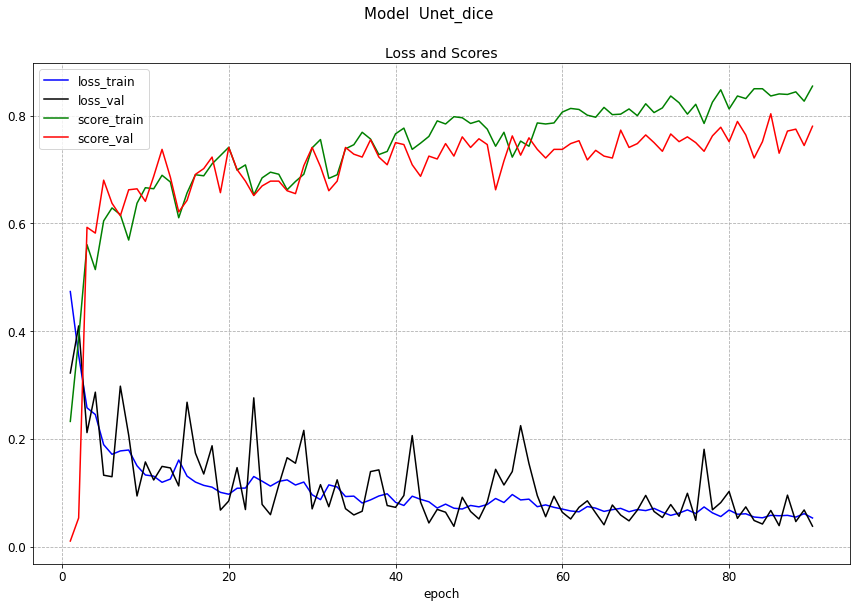

In [50]:
plots(history_unet_dice, 'Unet_dice')

In [51]:
unet_dice.to("cpu")
del unet_dice
torch.cuda.empty_cache()

## UNet+focal

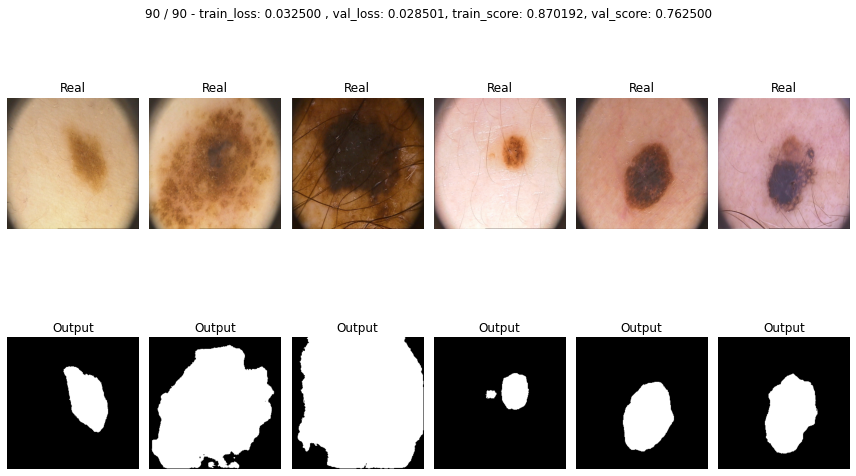

In [52]:
unet_focal = UNet().to(device)

optimizer = torch.optim.AdamW(unet_focal.parameters(), lr = BASE_LR, weight_decay=WEIGHT_DECAY)
history_unet_focal = train(unet_focal, optimizer, focal_loss, MAX_EPOCHS, data_tr, data_val, used_sheduler=True)

In [53]:
unet_focal_test_score = scores(unet_focal)

score на тесте: 0.8125


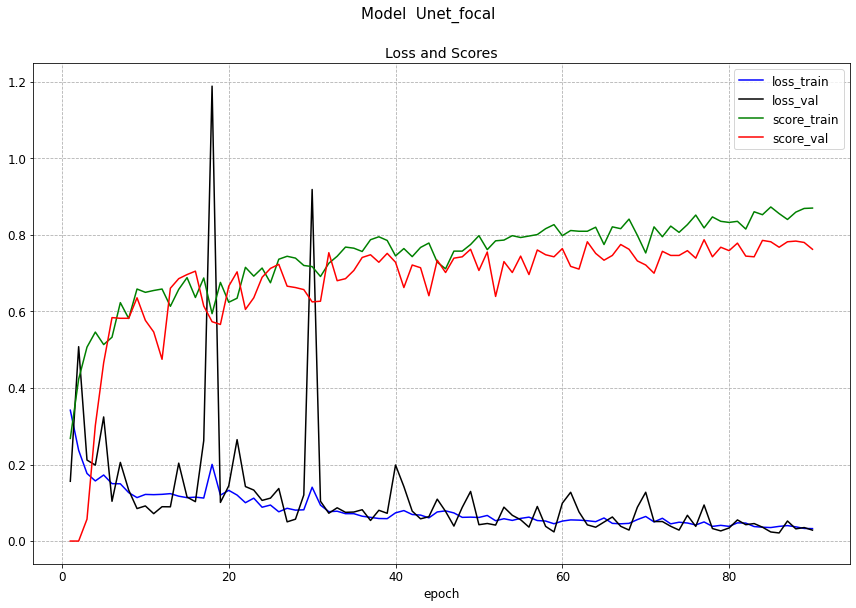

In [54]:
plots(history_unet_focal, 'Unet_focal')

In [55]:
unet_focal.to("cpu")
del unet_focal
torch.cuda.empty_cache()

## UNet+tversky 

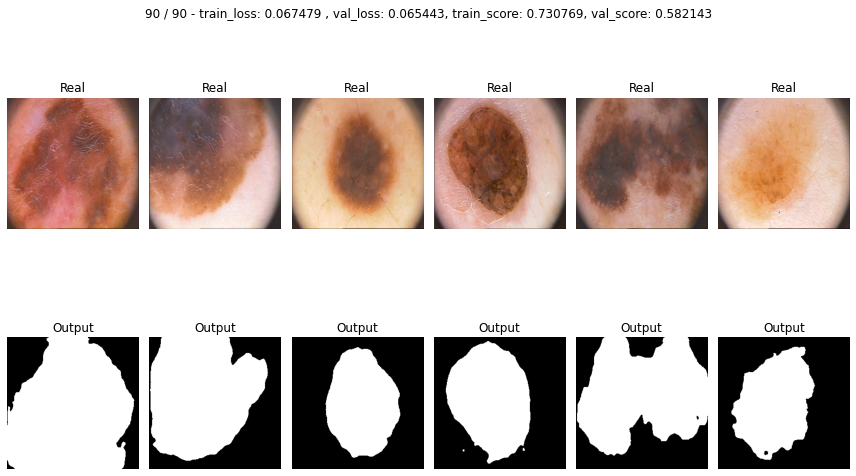

In [56]:
unet_tversky = UNet().to(device)

optimizer = torch.optim.AdamW(unet_tversky.parameters(), lr = BASE_LR, betas=(0.9, 0.999), eps=1e-8, weight_decay=WEIGHT_DECAY)
history_unet_tversky  = train(unet_tversky, optimizer, tversky_loss, MAX_EPOCHS, data_tr, data_val, used_sheduler=True)

In [57]:
unet_tversky_test_score = scores(unet_tversky)

score на тесте: 0.6464


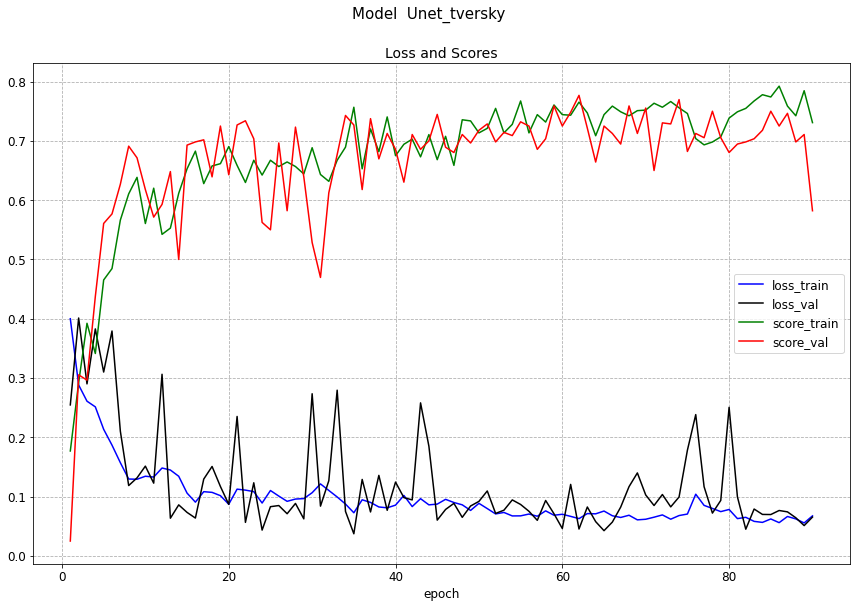

In [58]:
plots(history_unet_tversky, 'Unet_tversky')

In [59]:
unet_tversky.to("cpu")
del unet_tversky 
torch.cuda.empty_cache()

# UNet2

Новая модель путем изменения типа пулинга:

 **Max-Pooling** for the downsampling and **nearest-neighbor Upsampling** for the upsampling.

Down-sampling:

        conv = nn.Conv2d(3, 64, 3, padding=1)
        pool = nn.MaxPool2d(3, 2, padding=1)

Up-Sampling

        upsample = nn.Upsample(32)
        conv = nn.Conv2d(64, 64, 3, padding=1)

Замените max-pooling на convolutions с stride=2 и upsampling на transpose-convolutions с stride=2.


In [60]:
class UNet2(nn.Module):

    def __init__(self):
        super().__init__()


        # encoder (downsampling)
        # Each enc_conv/dec_conv block should look like this:
        # nn.Sequential(
        #     nn.Conv2d(...),
        #     ... (2 or 3 conv layers with relu and batchnorm),

        self.enc_conv0 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
            )
        self.pool0 = nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1) # 256 -> 128
        self.enc_conv1 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
            )
        self.pool1 = nn.Conv2d(128, 128, kernel_size=3, stride=2, padding=1) # 128 -> 64
        self.enc_conv2 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
            )
        self.pool2 = nn.Conv2d(256, 256, kernel_size=3, stride=2, padding=1) # 64 -> 32
        self.enc_conv3 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
            )
        self.pool3 = nn.Conv2d(512, 512, kernel_size=3, stride=2, padding=1) # 32 -> 16

        # bottleneck
        self.bottleneck_conv = nn.Sequential(
            nn.Conv2d(512, 1024, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(1024),
            nn.ReLU(),
            nn.Conv2d(1024, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
            )
        
        # decoder (upsampling)
        self.upsample0 = nn.ConvTranspose2d(512, 512, kernel_size=3, stride=2, padding=1) # 16 -> 32
        self.dec_conv0 = nn.Sequential(
            nn.Conv2d(512*2, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
            )
        self.upsample1 = nn.ConvTranspose2d(256, 256, kernel_size=3, stride=2, padding=1) # 32 -> 64
        self.dec_conv1 = nn.Sequential(
            nn.Conv2d(256*2, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
            )
        self.upsample2 = nn.ConvTranspose2d(128, 128, kernel_size=3, stride=2, padding=1) # 64 -> 128
        self.dec_conv2 = nn.Sequential(
            nn.Conv2d(128*2, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
            )
        self.upsample3 = nn.ConvTranspose2d(64, 64, kernel_size=3, stride=2, padding=1) # 128 -> 256
        self.dec_conv3 = nn.Sequential(
            nn.Conv2d(64*2, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 1, kernel_size=3, stride=1, padding=1),
            )
        
    def forward(self, x):

        # encoder
        pre_e0 = self.enc_conv0(x)
        e0 = self.pool0(pre_e0)
        pre_e1 = self.enc_conv1(e0)
        e1 = self.pool1(pre_e1)
        pre_e2 = self.enc_conv2(e1)
        e2 = self.pool2(pre_e2)
        pre_e3 = self.enc_conv3(e2)
        e3 = self.pool3(pre_e3)
        

        # bottleneck
        b = self.bottleneck_conv(e3)

        # decoder
        d0 = self.dec_conv0(torch.cat([self.upsample0(b, output_size=pre_e3.size()), pre_e3], 1))
        d1 = self.dec_conv1(torch.cat([self.upsample1(d0, output_size=pre_e2.size()), pre_e2], 1))
        d2 = self.dec_conv2(torch.cat([self.upsample2(d1, output_size=pre_e1.size()), pre_e1], 1))
        d3 = self.dec_conv3(torch.cat([self.upsample3(d2, output_size=pre_e0.size()), pre_e0], 1))

        return d3  


In [61]:
print(summary(UNet2().to(device), (3, 256, 256)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
       BatchNorm2d-2         [-1, 64, 256, 256]             128
              ReLU-3         [-1, 64, 256, 256]               0
            Conv2d-4         [-1, 64, 256, 256]          36,928
       BatchNorm2d-5         [-1, 64, 256, 256]             128
              ReLU-6         [-1, 64, 256, 256]               0
            Conv2d-7         [-1, 64, 128, 128]          36,928
            Conv2d-8        [-1, 128, 128, 128]          73,856
       BatchNorm2d-9        [-1, 128, 128, 128]             256
             ReLU-10        [-1, 128, 128, 128]               0
           Conv2d-11        [-1, 128, 128, 128]         147,584
      BatchNorm2d-12        [-1, 128, 128, 128]             256
             ReLU-13        [-1, 128, 128, 128]               0
           Conv2d-14          [-1, 128,

## UNet2+bce

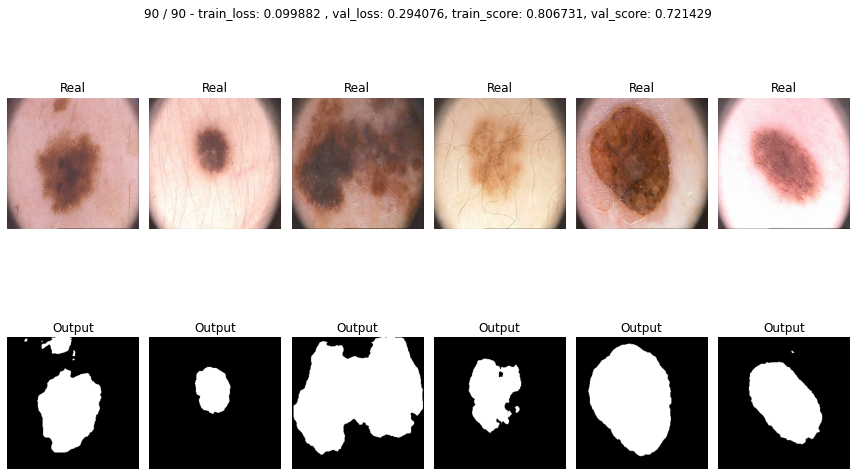

In [62]:
unet2_bce = UNet2().to(device)

optimizer = torch.optim.AdamW(unet2_bce.parameters(), lr = BASE_LR, betas=(0.9, 0.999), eps=1e-8, weight_decay=WEIGHT_DECAY)
history_unet2_bce = train(unet2_bce, optimizer, bce_loss, MAX_EPOCHS, data_tr, data_val, used_sheduler=True)

In [63]:
unet2_bce_test_score = scores(unet2_bce)

score на тесте: 0.7446


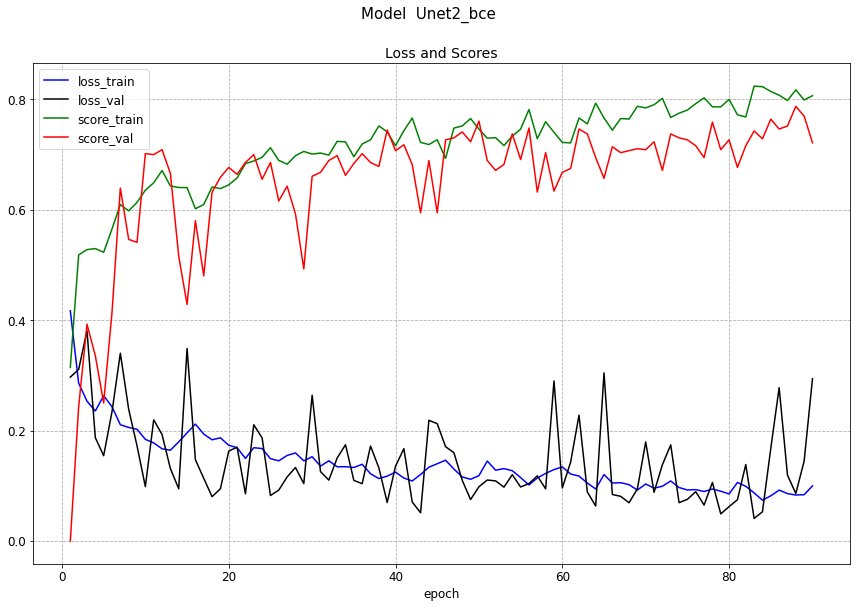

In [64]:
plots(history_unet2_bce, 'Unet2_bce')

In [65]:
unet2_bce.to("cpu")
del unet2_bce
torch.cuda.empty_cache()

## UNet2+dice

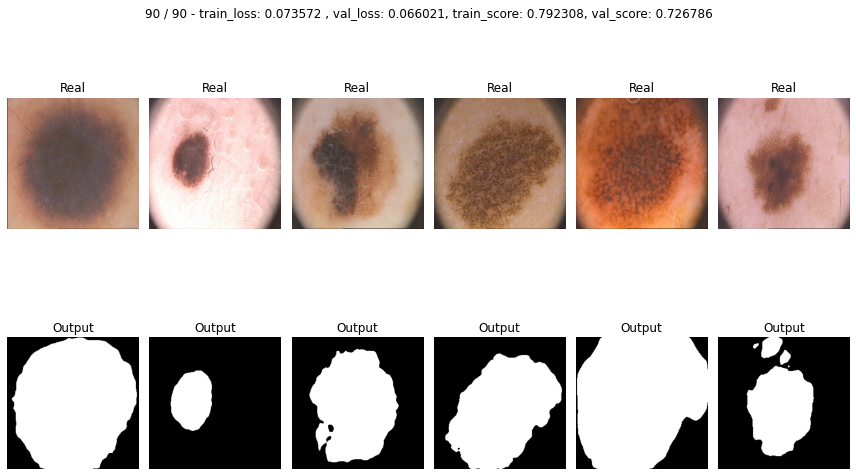

In [66]:
unet2_dice = UNet2().to(device)

optimizer = torch.optim.AdamW(unet2_dice.parameters(), lr = BASE_LR, weight_decay=WEIGHT_DECAY)
history_unet2_dice = train(unet2_dice, optimizer, dice_loss, MAX_EPOCHS, data_tr, data_val, used_sheduler=True)

In [67]:
unet2_dice_test_score = scores(unet2_dice)

score на тесте: 0.7161


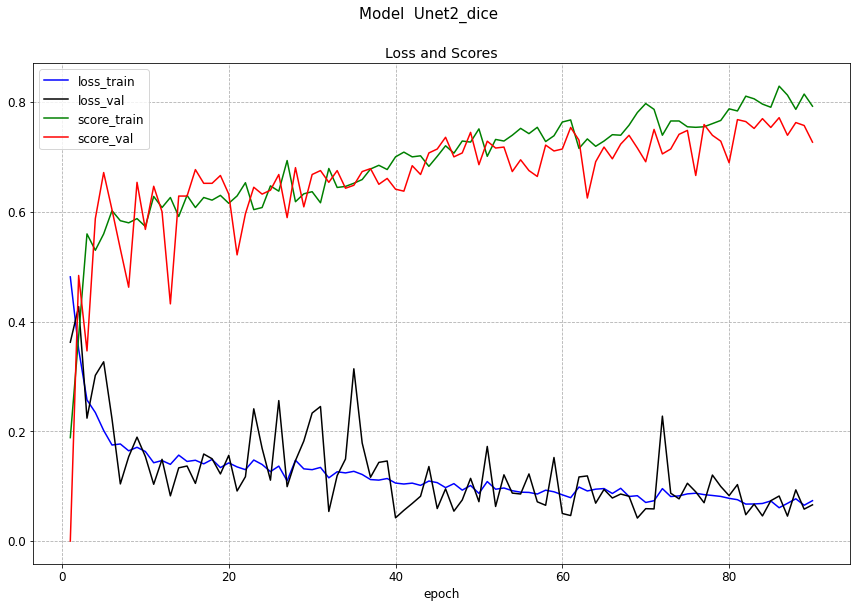

In [68]:
plots(history_unet2_dice, 'Unet2_dice')

In [69]:
unet2_dice.to("cpu")
del unet2_dice
torch.cuda.empty_cache()

## UNet2+focal

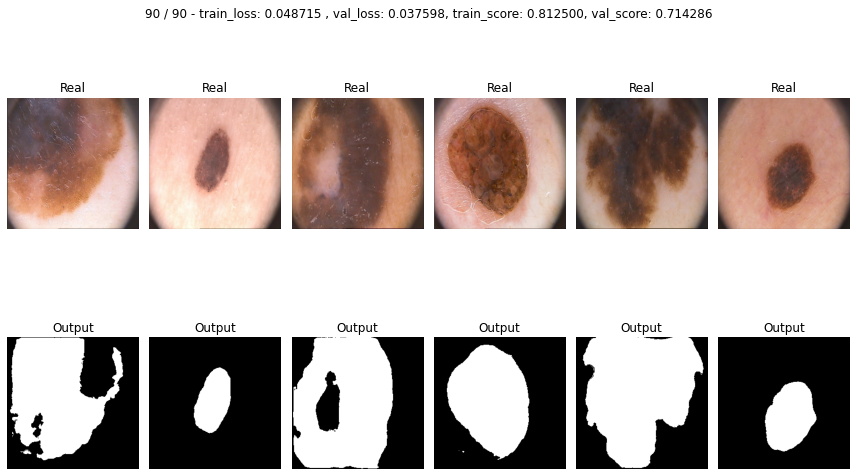

In [70]:
unet2_focal = UNet2().to(device)

optimizer = torch.optim.AdamW(unet2_focal.parameters(), lr = BASE_LR, weight_decay=WEIGHT_DECAY)
history_unet2_focal = train(unet2_focal, optimizer, focal_loss, MAX_EPOCHS, data_tr, data_val, used_sheduler=True)

In [71]:
unet2_focal_test_score = scores(unet2_focal)

score на тесте: 0.7750


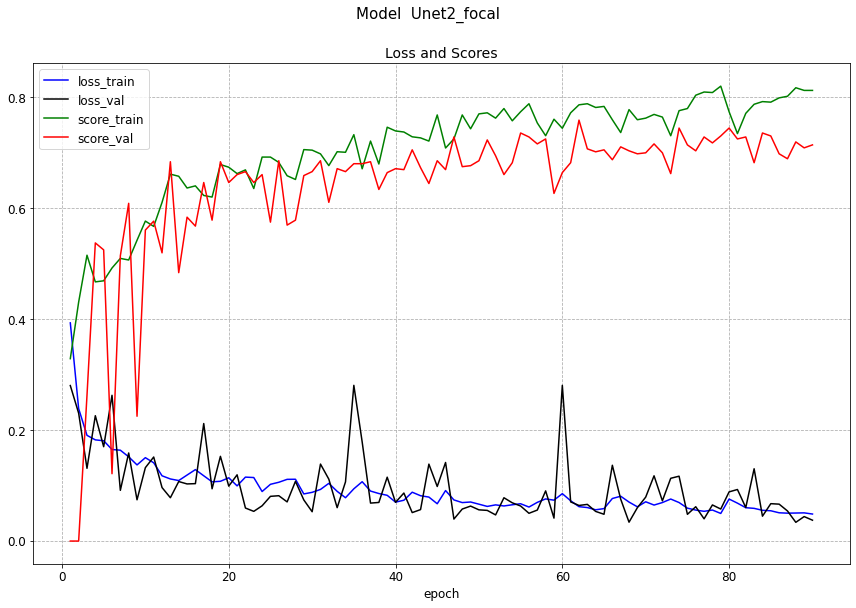

In [72]:
plots(history_unet2_focal, 'Unet2_focal')

In [73]:
unet2_focal.to("cpu")
del unet2_focal
torch.cuda.empty_cache()

## UNet2+tversky 

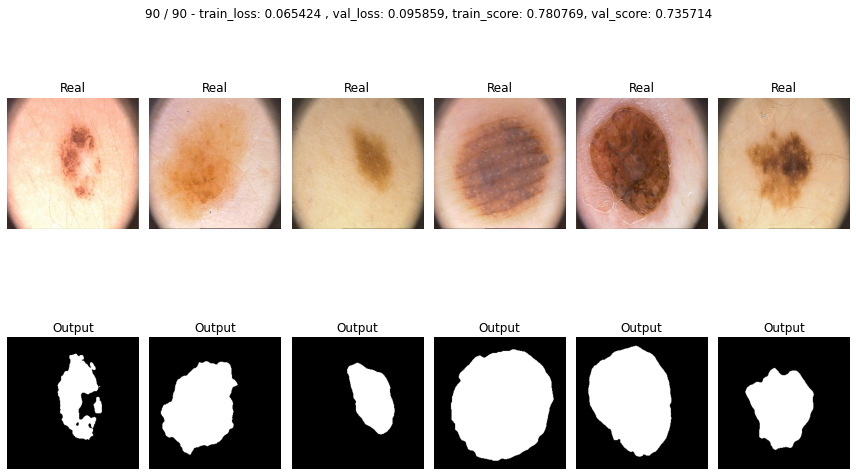

In [74]:
unet2_tversky  = UNet2().to(device)

optimizer = torch.optim.AdamW(unet2_tversky.parameters(), lr = BASE_LR, weight_decay=WEIGHT_DECAY)
history_unet2_tversky = train(unet2_tversky , optimizer, tversky_loss, MAX_EPOCHS, data_tr, data_val, used_sheduler=True)

In [75]:
unet2_tversky_test_score = scores(unet2_tversky)

score на тесте: 0.6839


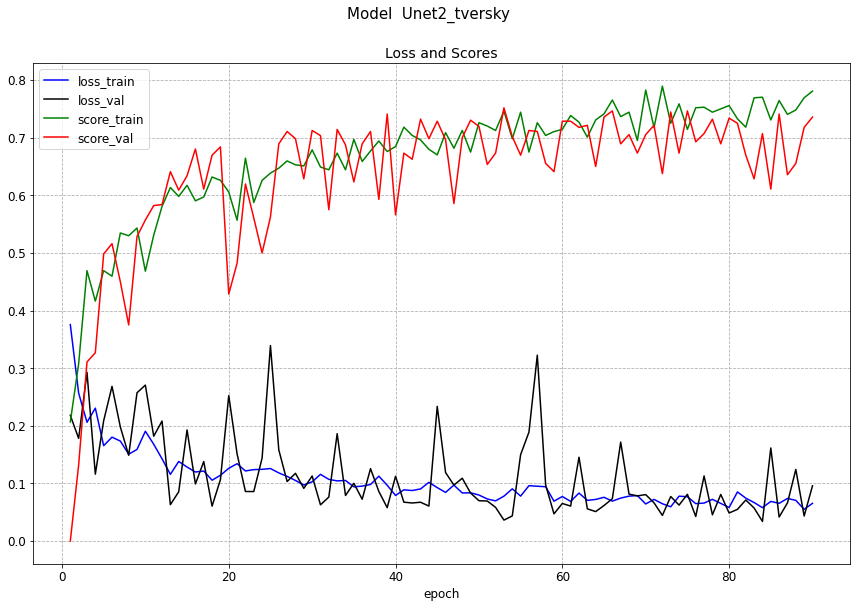

In [76]:
plots(history_unet2_tversky, 'Unet2_tversky')

In [77]:
unet2_tversky.to("cpu")
del unet2_tversky 
torch.cuda.empty_cache()

# Отчет (6 баллов): 
Ниже предлагается написать отчет о проделанно работе и построить графики для лоссов, метрик на валидации и тесте. 
Если вы пропустили какую-то часть в задании выше, то вы все равно можете получить основную часть баллов в отчете, если правильно зададите проверяемые вами гипотезы.


Аккуратно сравните модели между собой и соберите наилучшую архитектуру. Проверьте каждую модель с различными лоссами. Мы не ограничиваем вас в формате отчета, но проверяющий должен отчетливо понять для чего построен каждый график, какие выводы вы из него сделали и какой общий вывод можно сделать на основании данных моделей. Если вы захотите добавить что-то еще, чтобы увеличить шансы получения максимального балла, то добавляйте отдельное сравнение.

Дополнительные комментарии: 

Пусть у вас есть N обученных моделей.
- Является ли отчетом N графиков с 1 линей? Да, но очень низкокачественным, потому что проверяющий не сможет сам сравнить их.

- Является ли отчетом 1 график с N линиями? Да, но скорее всего таким образом вы отразили лишь один эффект. Этого мало, чтобы сделать досточно суждений по поводу вашей работа.

- Я проверял метрики на трейне, и привел в результате таблицу с N числами, что не так? ключейвой момент тут, что вы измеряли на трейне ваши метрики, уверены ли вы, что заивисмости останутся такими же на отложенной выборке?

- Я сделал отчет содержащий график лоссов и метрик, и у меня нет ошибок в основной части, но за отчет не стоит максимум, почему? Естестественно максимум баллов за отчет можно получить не за 2 графика (даже при условии их полной правильности). Проверяющий хочет видеть больше сравнений моделей, чем метрики и лоссы (особенно, если они на трейне).

Советы: попробуйте правильно поставить вопрос на который вы себе отвечаете и продемонстрировать таблицу/график, помогающий проверяющему увидеть ответ на этот вопрос. Пример: Ваня хочет узнать, с каким из 4-х лоссов модель (например, U-Net) имеет наилучшее качество. Что нужно сделать Ване? Обучить 4 одинаковых модели с разными лосс функциями. И измерить итогововое качество. Продемонстрировать результаты своих измерений и итоговый вывод. (warning: конечно же, это не идеально ответит на наш вопрос, так как мы не учитываем в экспериментах возможные различные типы ошибок, но для первого приближения этого вполне достаточно).

Примерное время на подготовку отчета 1 час, он содержит сравнеение метрик, график лоссов, выбор лучших моделей из нескольких кластеров и выбор просто лучшей модели, небольшой вывод по всему дз, возможно сравнение результирующих сегментаций, времени или числа параметров модели, проявляйте креативность.

# Графики score и loss в зависимости от функции потерь на валидационной выборке

In [78]:
def final_plots(interest_col, text, y_lim_min, y_lim_max, epochs=MAX_EPOCHS):
  x = np.arange(epochs)+1
  fig, ax = plt.subplots(1, 3, figsize = (20, 5), sharey = True)

  y1 = history_segnet_bce["val"][interest_col]
  y2 = history_segnet_dice["val"][interest_col]
  y3 = history_segnet_focal["val"][interest_col]
  y4 = history_segnet_tversky["val"][interest_col]
  ax[0].plot(x, y1, label = "BCE", color = "green")
  ax[0].plot(x, y2, label = "Dice", color = "red")
  ax[0].plot(x, y3, label = "Focal", color = "blue")
  ax[0].plot(x, y4, label = "Tversky", color = "orange")
  ax[0].legend(fontsize = 12)
  ax[0].grid(linestyle = "--")
  ax[0].tick_params(labelsize = 12)
  ax[0].set_ylabel("score", fontsize = 13)
  ax[0].set_title("SegNet", fontsize = 14)
  ax[0].set_xlabel("epoch", fontsize = 12)
  ax[0].set_ylim(y_lim_min, y_lim_max)

  y1 = history_unet_bce["val"][interest_col]
  y2 = history_unet_dice["val"][interest_col]
  y3 = history_unet_focal["val"][interest_col]
  y4 = history_unet_tversky["val"][interest_col]
  ax[1].plot(x, y1, label = "BCE", color = "green")
  ax[1].plot(x, y2, label = "Dice", color = "red")
  ax[1].plot(x, y3, label = "Focal", color = "blue")
  ax[1].plot(x, y4, label = "Tversky", color = "orange")
  ax[1].legend(fontsize = 12)
  ax[1].grid(linestyle = "--")
  ax[1].tick_params(labelsize = 12)
  ax[1].set_title("UNet", fontsize = 14)
  ax[1].set_xlabel("epoch", fontsize = 12)
  ax[1].set_ylim(y_lim_min, y_lim_max)

  y1 = history_unet2_bce["val"][interest_col]
  y2 = history_unet2_dice["val"][interest_col]
  y3 = history_unet2_focal["val"][interest_col]
  y4 = history_unet2_tversky["val"][interest_col]
  ax[2].plot(x, y1, label = "BCE", color = "green")
  ax[2].plot(x, y2, label = "Dice", color = "red")
  ax[2].plot(x, y3, label = "Focal", color = "blue")
  ax[2].plot(x, y4, label = "Tversky", color = "orange")
  ax[2].legend(fontsize = 12)
  ax[2].grid(linestyle = "--")
  ax[2].tick_params(labelsize = 12)
  ax[2].set_title("UNet2", fontsize = 14)
  ax[2].set_xlabel("epoch", fontsize = 12)
  ax[2].set_ylim(y_lim_min, y_lim_max)
  plt.suptitle(text, fontsize = 16, y=1.05)
  plt.tight_layout()
  plt.show()

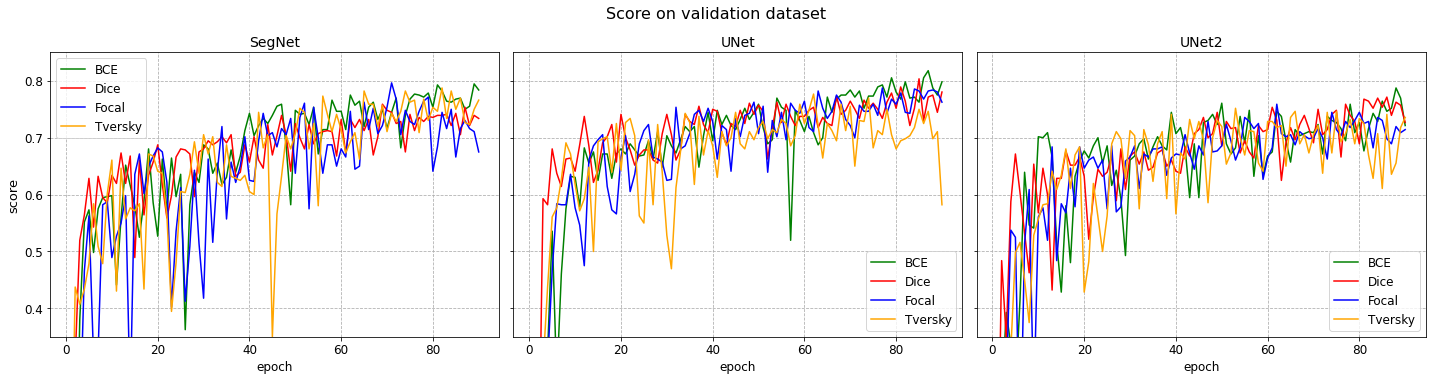

In [79]:
final_plots('score', "Score on validation dataset", 0.35, 0.85)

По модели SegNet:  

Из графиков видно, что наиболее стабильно, без выбросов ведет себя loss-функция Dice, хотя наибольшие значения скора у бинарной кроссэнтропии. 

По модели Unet: 

Наиболее стабильно опять же Dice, а также Focal. Наивысшие значения после 90 эпох у BCE.

По модели Unet2: 

Наиболее стабильны опять же Dice и Focal. Наивысший скор после 90 эпох у BCE и Dice.

ВЫВОД:
При сравнении моделей между собой, видим, что при любой функции потерь, Unet ведет себя наилучшим образом. 

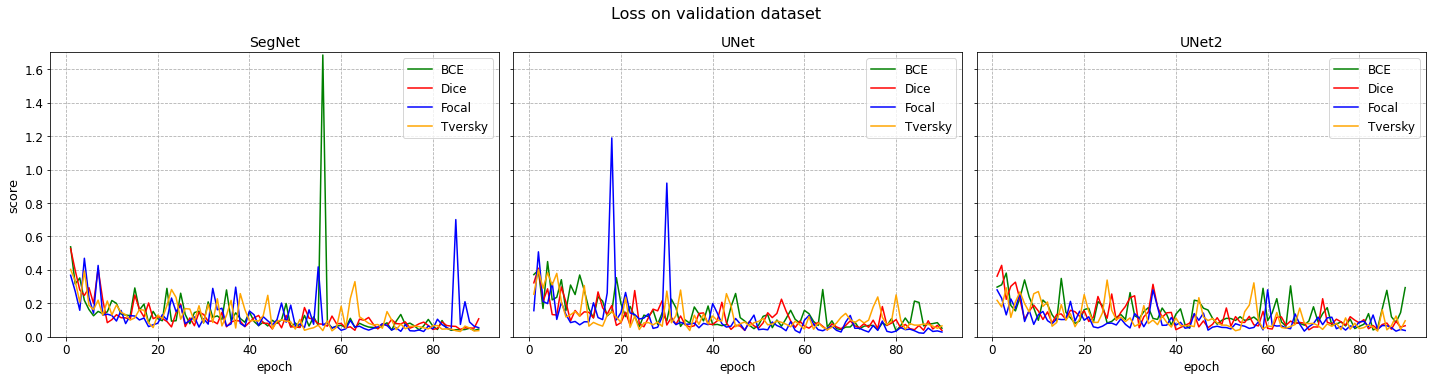

In [86]:
final_plots('loss', "Loss on validation dataset", 0, 1.7)

По модели SegNet:  

Из графиков видно, что наиболее стабилен loss у Dice, хотя в итоге после 90 эпох все 4 модели показывают примерно равный loss. У BCE видим сильнейший выброс в середине обучения. У Focal в конце. 

По модели Unet: 

Наиболее не стабильна Focal, но в итоге в конце обучения все функции сходятся примерно к одному значению около 0.05.

По модели Unet2: 

Особо сильных выбросов не наблюдается ни у одной модели, в конце обучения наименьший loss у Focal, а наихудший у бинарной кроссэнтропии.


ВЫВОД: Из графиков не видно какого-то однозначного лидера. К концу обучения все модели имеют похожее значение лосса.

# Таблицы максимального score по моделям

In [81]:
# Выведем таблицу со скором на ТЕСТОВОЙ выборке по всем моделям

import pandas as pd

data = {'Loss' :  ['BCE', 
                   'DICE',
                   'FOCAL',
                   'TVERSKY'], 
        'Segnet': [segnet_bce_test_score, 
                   segnet_dice_test_score,
                   segnet_focal_test_score,
                   segnet_tversky_test_score], 
        'Unet' :  [unet_bce_test_score, 
                   unet_dice_test_score,
                   unet_focal_test_score,
                   unet_tversky_test_score], 
        'Unet2' : [unet2_bce_test_score, 
                   unet2_dice_test_score,
                   unet2_focal_test_score,
                   unet2_tversky_test_score]}

df =  pd.DataFrame(data)
df = df.set_index('Loss')
df

Segnet      Unet     Unet2
Loss                                 
BCE      0.773214  0.819643  0.744643
DICE     0.703571  0.792857  0.716071
FOCAL    0.753571  0.812500  0.775000
TVERSKY  0.776786  0.646429  0.683929

In [82]:
# Выведем наивысший скор и название функции потерь по каждой модели 

data = {  'MODEL' :  ['SegNet', 'Unet', 'Unet2'],
          'MAX_SCORE' : [df['Segnet'].max().round(3), df['Unet'].max().round(3), df['Unet2'].max().round(3)],
          'LOSS_FN' : [df['Segnet'].idxmax(), df['Unet'].idxmax(), df['Unet2'].idxmax()]}

df_max_scores =  pd.DataFrame(data)
df_max_scores         

MODEL  MAX_SCORE  LOSS_FN
0  SegNet      0.777  TVERSKY
1    Unet      0.820      BCE
2   Unet2      0.775    FOCAL

In [83]:
# Выведем наивысший скор из всех 12 моделей и функцию потерь
df_max_scores[df_max_scores['MAX_SCORE'] == df.max().max().round(3)]

MODEL  MAX_SCORE LOSS_FN
1  Unet       0.82     BCE

# Вывод

**ОТЧЕТ:**

В работе не получилось написать креативную функцию потерь. К сожалению. 
Также изначально была идея написать какой-то pipeline по сборке Scores на тестовой выборке, но за неимением лишнего времени, пришлось пойти костыльным путем. 


С точки зрения получившихся результатов: невооруженным глазом кажется, что модели довольно неплохо сегментируют родинки на изображениях, однако, цифры не врут. И 0.82 у модели Unet с BCE - это максимальный скор из всех 12 моделей. 
Скорее всего, можно было бы добиться лучшего скора, если поработать с параметрами, но объем ГПУ этого не позволяет. Даже платная подписка, увы и ах.


Что касается каждой модели в частности, то, как можно видеть из сводной таблицы, для SegNet наивысший скор был получен с loss-функцией TVERSKY (0.777), для Unet c loss-функцией BCE (0.82), для Unet2 c loss-функцией FOCAL (0.775).

Табличные значения подтверждаются графиками, приведенными чуть выше. Выводы к графикам коррелируют с приведенными здесь выводами. 


Что касается графиков, приведенных после обучения каждой модели, то сильного расхождения между показателями на обучения и показателями после валидации выявлено не было. 